# Band Structure of a 1D Photonic Crystal

In this example, we consider a one-dimensional photonic crystal made of two alternating layers: Layer A and Layer B. The unit cell has period $(\Lambda = d_a + d_b)$.

The key parameters are:
- **Layer A:** $(\epsilon_a = 4), \quad (\mu_a = 1), \quad thickness (d_a = 0.4\Lambda)$
- **Layer B:** $(\epsilon_b = 1), \quad (\mu_b = 1), \quad thickness (d_b = 0.6\Lambda)$

For a TE-polarized wave incident normally, the electric field $E(x)$ in a homogeneous medium satisfies the Helmholtz equation:

$$\frac{d^2E}{dx^2} + \omega^2\epsilon, \quad E = 0.$$

We convert this second-order ODE into a first-order system by defining the state vector

$$U(x) = \begin{pmatrix} E(x) \\ E'(x) \end{pmatrix}.$$

Thus, the system becomes

$$U'(x) = \begin{pmatrix} 0 & 1 \\ -\omega^2 \epsilon & 0 \end{pmatrix} U(x).$$

In each layer, the general solution is a combination of forward and backward propagating waves. For a homogeneous layer (say, layer A), the solution can be written in terms of a transfer matrix:

$$
M_A(x) = \begin{pmatrix}
\cos(k_a x) & \dfrac{1}{k_a}\sin(k_a x) \\
- k_a\sin(k_a x) & \cos(k_a x)
\end{pmatrix},
$$

with $k_a = \omega \sqrt{\epsilon_a}.$

Similarly, for layer B we have

$$
M_B(x) = \begin{pmatrix}
\cos(k_b x) & \dfrac{1}{k_b}\sin(k_b x) \\
- k_b\sin(k_b x) & \cos(k_b x)
\end{pmatrix},
$$

with $k_b = \omega \sqrt{\epsilon_b}$.

We also define the impedance in each layer as

$$
z_i = \sqrt{\frac{\mu_i}{\epsilon_i}}, \quad i=a,b.
$$

For our parameters, we find:

$$
z_a = \sqrt{\frac{1}{4}} = 0.5,\quad z_b = 1.
$$

The overall transfer matrix for one unit cell (first propagating through A then B) is given by:

$$
M_{\text{cell}} = M_B(d_b) \, M_A(d_a).
$$

Bloch's theorem then imposes the condition:

$$
U(\Lambda) = M_{\text{cell}} \, U(0) = e^{i q \Lambda} U(0).
$$

Taking the trace of the $2 \times 2$ matrix, we arrive at the dispersion relation:

$$
\cos(q\Lambda) = \cos(k_a d_a)\cos(k_b d_b) - \frac{1}{2}\left(\frac{z_a}{z_b} + \frac{z_b}{z_a}\right) \sin(k_a d_a)\sin(k_b d_b).
$$

In our case, $\frac{z_a}{z_b} + \frac{z_b}{z_a} = 0.5 + 2 = 2.5$, so the prefactor becomes $1.25$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Define Parameters and Basic Quantities
# -------------------------------
# Layer A parameters
epsilon_a = 4.0
mu_a = 1.0
d_a = 0.4  # thickness as a fraction of unit cell period (Lambda = 1)

# Layer B parameters
epsilon_b = 1.0
mu_b = 1.0
d_b = 0.6  # Lambda = d_a + d_b = 1

Lambda = d_a + d_b  # unit cell period

# Refractive indices and wave numbers (assuming c=1)
# k_i = omega * sqrt(epsilon_i * mu_i)
k_a = lambda omega: omega * np.sqrt(epsilon_a * mu_a)
k_b = lambda omega: omega * np.sqrt(epsilon_b * mu_b)

# Impedances: z_i = sqrt(mu_i/epsilon_i)
z_a = np.sqrt(mu_a / epsilon_a)  # For layer A: 0.5
z_b = np.sqrt(mu_b / epsilon_b)  # For layer B: 1.0

print(f"z_a = {z_a}, z_b = {z_b}")

z_a = 0.5, z_b = 1.0


# Step 2: Define the Dispersion Function

The dispersion relation for the 1D photonic crystal is:

$$
\cos(q\Lambda) = \cos(k_a d_a)\cos(k_b d_b) - \frac{1}{2}\left(\frac{z_a}{z_b} + \frac{z_b}{z_a}\right) \sin(k_a d_a)\sin(k_b d_b).
$$

For our parameters:
- $k_a = \omega\sqrt{\epsilon_a}$ and $k_b = \omega\sqrt{\epsilon_b}$,
- $\frac{z_a}{z_b} + \frac{z_b}{z_a} = 0.5 + 2 = 2.5$, so the factor becomes $1.25$.

We define a function $F(\omega)$ as the right-hand side:

$$
F(\omega) = \cos(k_a d_a) \cos(k_b d_b) - 1.25\,\sin(k_a d_a)\sin(k_b d_b).
$$

For a real Bloch wave, we require $|F(\omega)| \leq 1$. Then, the Bloch wave vector is given by:

$$
q = \arccos\left(F(\omega)\right).
$$

In [2]:
# -------------------------------
# Step 2: Define the Dispersion Function
# -------------------------------
F = lambda omega: (np.cos(k_a(omega)*d_a) * np.cos(k_b(omega)*d_b)
                   - 0.5 * (z_a/z_b + z_b/z_a) * np.sin(k_a(omega)*d_a) * np.sin(k_b(omega)*d_b))

# Step 3: Compute Allowed Bloch Wave Vectors

We now sample a range of frequencies $\omega$ and compute the corresponding Bloch wave vector $q$ where the condition $|F(\omega)| \leq 1$ holds (i.e., where a propagating solution exists).

The eigenvalue condition from Bloch's theorem is:

$$
e^{i q \Lambda} + e^{-i q \Lambda} = 2\cos(q\Lambda) = 2\cos\left(q\Lambda\right),
$$

which implies

$$
q = \arccos\left(F(\omega)\right).
$$

We compute $q$ for the positive branch and then include the negative branch to produce a symmetric band structure.

In [3]:
# -------------------------------
# Step 3: Compute Allowed Bloch Wave Vectors
# -------------------------------
# We normalize frequency as omega_norm = (omega * Lambda)/(2*pi).
# We want to plot omega_norm from 0 to 3, i.e. omega from 0 to 6*pi.
omega_max = 6 * np.pi  # maximum omega in our simulation
omega_vals = np.linspace(0, omega_max, 20000)

# Initialize lists for the allowed q values and corresponding omega
q_plus = []   # positive branch
q_minus = []  # negative branch (mirror)
omega_allowed = []

for omega in omega_vals:
    f_val = F(omega)
    # Only include omega values where |F(omega)| <= 1 (real q)
    if np.abs(f_val) <= 1.0:
        q_val = np.arccos(f_val)
        q_plus.append(q_val)
        q_minus.append(-q_val)
        omega_allowed.append(omega)

# Convert lists to numpy arrays
q_plus = np.array(q_plus)
q_minus = np.array(q_minus)
omega_allowed = np.array(omega_allowed)

# Step 4: Normalize Variables for Plotting

We now normalize the Bloch wave vector and the frequency according to:
- **Normalized Bloch wave vector:**
  
  $$
  q_{\text{norm}} = \frac{q\Lambda}{2\pi}.
  $$

  With $\Lambda = 1$, this simplifies to $q/(2\pi)$. This will allow the $x$-axis to range from $-0.5$ to $0.5$.

- **Normalized frequency:**
  
  $$
  \omega_{\text{norm}} = \frac{\omega\Lambda}{2\pi c}.
  $$

  With $c=1$ and $\Lambda=1$, this is $\omega/(2\pi)$. We choose our $\omega$ range such that $\omega_{\text{norm}}$ runs from $0$ to $3$.

In [4]:
# -------------------------------
# Step 4: Normalize Variables for Plotting
# -------------------------------
q_plus_norm = q_plus / (2 * np.pi)
q_minus_norm = q_minus / (2 * np.pi)
omega_norm = omega_allowed / (2 * np.pi)

# Step 5: Plot the Band Structure

We now create a scatter plot of the allowed bands in normalized units. The $x$-axis represents the normalized Bloch wave vector $q_\text{norm} = \frac{q\Lambda}{2\pi}$ (ranging from $-0.5$ to $0.5$) and the $y$-axis represents the normalized frequency $\omega_\text{norm} = \frac{\omega\Lambda}{2\pi}$ (ranging from $0$ to $3$).

This plot reveals the pass bands (where $q$ is real) separated by band gaps (where no propagating solution exists).

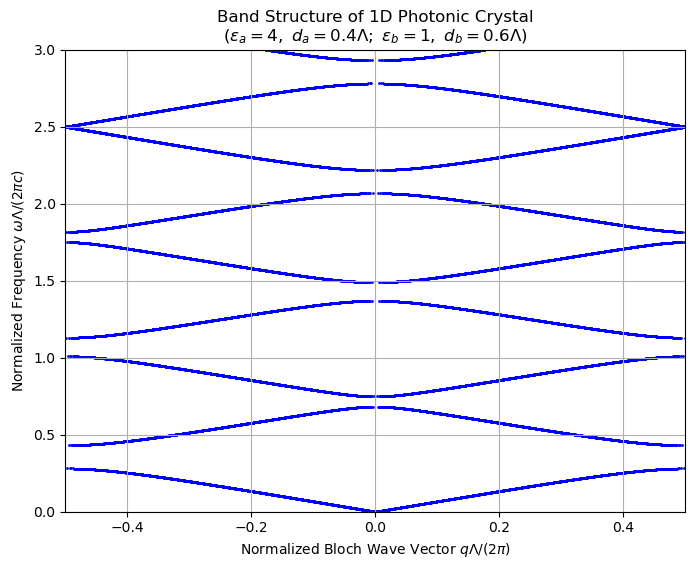

In [7]:
# -------------------------------
# Step 5: Plot the Band Structure
# -------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(q_plus_norm, omega_norm, s=1, color='blue')
plt.scatter(q_minus_norm, omega_norm, s=1, color='blue')
plt.xlabel(r'Normalized Bloch Wave Vector $q\Lambda/(2\pi)$')
plt.ylabel(r'Normalized Frequency $\omega\Lambda/(2\pi c)$')
plt.title('Band Structure of 1D Photonic Crystal\n'
          r'($\epsilon_a=4,\ d_a=0.4\Lambda;\ \epsilon_b=1,\ d_b=0.6\Lambda$)')
plt.xlim(-0.5, 0.5)
plt.ylim(0, 3)
plt.grid(True)
plt.show()

# Summary of the Process

1. **Equation Setup and Parameter Definition:**  
   We began by writing the Helmholtz equation for the electric field and converting it into a first-order system. The key parameters were defined for layers A and B.

2. **Transfer Matrix Formulation:**  
   For each homogeneous layer, we derived the transfer matrix $M_i(x)$ which relates the state vector $U(x)$ to $U(0)$. These matrices capture the oscillatory behavior and the impedance matching in each layer.

3. **Constructing the Unit Cell:**  
   The overall transfer matrix for one unit cell is obtained by multiplying the matrices of layer A and layer B:  
   
   $$
   M_{\text{cell}} = M_B(d_b)\, M_A(d_a).
   $$

4. **Applying Bloch's Theorem:**  
   Imposing the Bloch condition $U(\Lambda) = e^{i q \Lambda} U(0)$ leads to the eigenvalue problem, and by taking the trace we obtain the dispersion relation:
   
   $$
   \cos(q\Lambda) = \cos(k_a d_a)\cos(k_b d_b) - \frac{1}{2}\left(\frac{z_a}{z_b} + \frac{z_b}{z_a}\right) \sin(k_a d_a)\sin(k_b d_b).
   $$

5. **Numerical Computation and Normalization:**  
   We numerically computed the Bloch wave vector $q$ for a range of frequencies where $|F(\omega)| \leq 1$ and then normalized both $q$ and $\omega$ for plotting.

6. **Plot Generation:**  
   Finally, we plotted the normalized band structure with $q\Lambda/(2\pi)$ on the $x$-axis and $\omega\Lambda/(2\pi c)$ on the $y$-axis.